## Overlap of dataset images for each class

In [1]:
from PIL import Image

In [5]:
def overlay_image(image1, image2):
    background = Image.open(image1)
    overlay = Image.open(image2)

    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")

    new_img = Image.blend(background, overlay, 0.4)
    
    return new_img

def load_image(image):
    background = Image.open(image)

    return background.convert("RGBA")

In [16]:
rootpath = 'full_set_results/cross_entropy/images/os_32'
ex_image_1 = rootpath+'/0/51_image.png'
ex_target_1 = rootpath+'/0/51_target.png'
ex_image_2 = rootpath+'/3/169_image.png'
ex_target_2 = rootpath+'/3/169_target.png'
ex_image_3 = rootpath+'/3/173_image.png'
ex_target_3 = rootpath+'/3/173_target.png'
ex_image_4 = rootpath+'/4/29_image.png'
ex_target_4 = rootpath+'/4/29_target.png'
ex_image_5 = rootpath+'/0/15_image.png'
ex_target_5 = rootpath+'/0/15_target.png'
ex_image_6 = rootpath+'/0/2_image.png'
ex_target_6 = rootpath+'/0/2_target.png'

images = [ex_image_1, ex_image_2, ex_image_3, ex_image_4, ex_image_5, ex_image_6]
targets = [ex_target_1, ex_target_2, ex_target_3, ex_target_4, ex_target_5, ex_target_6]

In [17]:
overlayed_images = [overlay_image(images[c], targets[c]) for c in range(0,6)]

for img in images:
    overlayed_images.append(load_image(img))

In [18]:
len(overlayed_images)

12

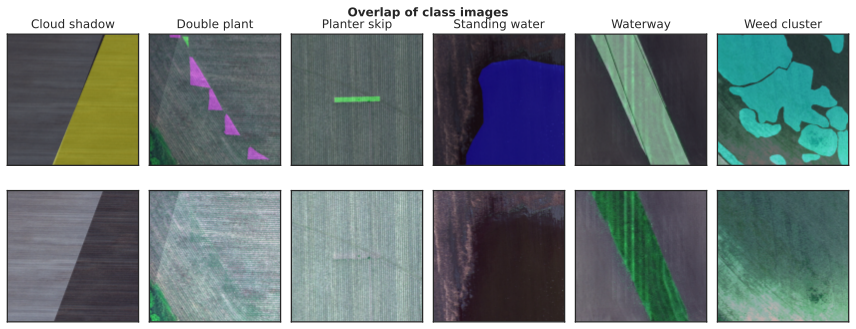

In [20]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')
class_name = ['Cloud shadow', 'Double plant', 'Planter skip', 'Standing water','Waterway', 'Weed cluster']

# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(12,4.9))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(overlayed_images[i], cmap=plt.cm.jet)
    #plt.colorbar()
    if i < 6:
        plt.title('{}'.format(class_name[i]))
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.tight_layout()
plt.suptitle('Overlap of class images', fontweight='bold')
fig.savefig("../Report/Plots/labelled_images.pdf", bbox_inches='tight')
plt.show()
